# Plot fig 7.22

Theme Song: Into The Waves<br>
Artist: Alcest<br>
Album: Shelter<br>
Released: 2014

Plotting Figure ~~7.24~~7.21. now 7.22 for Chapter 7 AR6, Piers Forster 23 Febuary 2021
Bug fixed 9 March 2021

In [1]:
import fair
fair.__version__

'1.6.2'

In [2]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
import matplotlib.patches as mp
# from netCDF4 import Dataset
import warnings
from matplotlib.ticker import AutoMinorLocator
from fair.constants import molwt
from scipy.interpolate import interp1d

In [3]:
pl.rcParams['figure.figsize'] = (9/2.54, 9/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 150

In [4]:
# Replace Piers' SCEN files with the precise emissions going in to AR6
# from notebook 150
data_path = 'C:/Users/mastr/Documents/LSCE/fig_722_FaiR/'
ssp_df = pd.read_csv(data_path+'rcmip-emissions-annual-means-v5-1-0.csv')
years = np.arange(1750,2401)
startyear = 1750
first_scenyear = 2015
last_scenyear = 2400
first_row = int(first_scenyear-startyear)
last_row = int(last_scenyear-startyear)

species = [  # in fair 1.6, order is important
    '|CO2|MAGICC Fossil and Industrial',
    '|CO2|MAGICC AFOLU',
    '|CH4',
    '|N2O',
    '|Sulfur',
    '|CO',
    '|VOC',
    '|NOx',
    '|BC',
    '|OC',
    '|NH3',
    '|CF4',
    '|C2F6',
    '|C6F14',
    '|HFC23',
    '|HFC32',
    '|HFC4310mee',
    '|HFC125',
    '|HFC134a',
    '|HFC143a',
    '|HFC227ea',
    '|HFC245fa',
    '|SF6',
    '|CFC11',
    '|CFC12',
    '|CFC113',
    '|CFC114',
    '|CFC115',
    '|CCl4',
    '|CH3CCl3',
    '|HCFC22',
    '|HCFC141b',
    '|HCFC142b',
    '|Halon1211',
    '|Halon1202',
    '|Halon1301',
    '|Halon2402',
    '|CH3Br',
    '|CH3Cl',
]

# Assume that units coming out of aneris don't change. One day I'll do unit parsing
unit_convert = np.ones(40)
unit_convert[1] = 12/44/1000
unit_convert[2] = 12/44/1000
unit_convert[4] = 28/44/1000
unit_convert[5] = 32/64
unit_convert[8] = 14/46

emissions = {}

scens = ['ssp119', 'ssp126', 'ssp434', 'ssp460', 'ssp534-over', 'ssp585']
for scen in scens:
    emissions[scen] = np.ones((651, 40)) * np.nan
    emissions[scen][:,0] = years

    years_future = [2015] + list(range(2020,2401,10))
    for i, specie in enumerate(species):
        emissions[scen][:first_row,i+1] = ssp_df.loc[(ssp_df['Region']=='World')&(ssp_df['Scenario']==scen)&(ssp_df['Variable'].str.endswith(specie)),str(startyear):'2014']*unit_convert[i+1]
        f = interp1d(years_future, ssp_df.loc[(ssp_df['Region']=='World')&(ssp_df['Scenario']==scen)&(ssp_df['Variable'].str.endswith(specie)),'2015':'2400'].dropna(axis=1))
        emissions[scen][first_row:(last_row+1), i+1] = f(np.arange(first_scenyear, last_scenyear+1))*unit_convert[i+1]

In [5]:
emissions_noCH4 = {}
for scen in scens:
    emissions_noCH4[scen] = np.copy(emissions[scen])
    emissions_noCH4[scen][:,3] = 0

In [6]:
#AR6 impulse numbers Appendix 7.A.2: Zeb Nicholls 21.02.2021 after F2x revision to 3.93
q = np.array([0.443767729, 0.31959105])
d = np.array([3.424102092, 285.0034778])
e= 1.027859 # not used

In [7]:
# add in natural emissions and natural forcing
ch4_n2o_df = pd.read_csv(data_path + 'fair_wg3_natural_ch4_n2o.csv')
ch4_n2o = ch4_n2o_df.values[:651,1:]

In [8]:
#yr=np.arange(1750, 2101)
C26, F26, T26 = fair.forward.fair_scm(
    emissions=emissions['ssp126'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)
C26n, F26n, T26n = fair.forward.fair_scm(
    emissions=emissions_noCH4['ssp126'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)

C60, F60, T60 = fair.forward.fair_scm(
    emissions=emissions['ssp460'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)
C60n, F60n, T60n = fair.forward.fair_scm(
    emissions=emissions_noCH4['ssp460'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)

#yr=np.arange(1750, 2101)
C19, F19, T19 = fair.forward.fair_scm(
    emissions=emissions['ssp119'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)
C19n, F19n, T19n = fair.forward.fair_scm(
    emissions=emissions_noCH4['ssp119'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)

C34, F34, T34 = fair.forward.fair_scm(
    emissions=emissions['ssp434'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)
C34n, F34n, T34n = fair.forward.fair_scm(
    emissions=emissions_noCH4['ssp434'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)

#yr=np.arange(1750, 2101)
C534, F534, T34o = fair.forward.fair_scm(
    emissions=emissions['ssp534-over'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)
C534n, F534n, T34on = fair.forward.fair_scm(
    emissions=emissions_noCH4['ssp534-over'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)

C85, F85, T85 = fair.forward.fair_scm(
    emissions=emissions['ssp585'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)
C85n, F85n, T85n = fair.forward.fair_scm(
    emissions=emissions_noCH4['ssp585'],
    q=q,
    d=d,
    tcrecs = np.array([1.8, 3.0]),
    F2x=3.93,
    natural=ch4_n2o,
    F_solar=0,
    F_volcanic=0,
    ghg_forcing='Meinshausen',
    scale_F2x=False
)

T34o_ch4=T34o-T34on

T85_ch4=T85-T85n

T19_ch4=T19-T19n

T34_ch4=T34-T34n

T26_ch4=T26-T26n

T60_ch4=T60-T60n

In [9]:
# 221 84 46
# 33 52 219
# 53 165 197
# 170 24 24
# 8 46 114
# 236 156 46
# 50 127 81
# 128 54 168



colors = {
    'CGTP': '#dd542e',
    'GWP100': '#2134db',
    'GTP100': '#aa1818',
    'GWP20': '#35a5c5',
    'GWP*': '#327f51',
    'GSAT': '#000000'
}

In [10]:
#CELLS TO SAVE IN SHARABLE CODE
#### function to calc GWP* for a gas
#### eventually, put this in its own file and import it to tidy things up here

def convert_gwpstar(emis1,emis0,gwp100,verbose=False):
    #emis1 is the emission list you wish to convert 
    #emis0 is the emission list for 20 years ago
    #gwp100 is the gwp value to use. 
    
    if verbose == True:
        print ('convert ',emis1, 'to co2e*')
    if verbose == True:
        print ('ch4gwp100 used is ',gwp100, 'and Delta t is ',delt)
        print ((np.subtract(emis1,emis0) ) * gwp100 * 100. / float(delt) )
    return (np.subtract(emis1,emis0) )* gwp100 * 100. / float(delt)

In [11]:
delt=20
b=np.zeros(delt)
e60long=np.append(b,emissions['ssp460'][:,3])
e26long=np.append(b,emissions['ssp126'][:,3])
e19long=np.append(b,emissions['ssp119'][:,3])
e34long=np.append(b,emissions['ssp434'][:,3])
e34olong=np.append(b,emissions['ssp534-over'][:,3])
e85long=np.append(b,emissions['ssp585'][:,3])
yrlong=np.append(np.arange(delt)+1750-delt,years)

In [12]:
gwp100ch4=28.87

e_19=e19long[delt:]
e_19_0=e19long[:-delt]
flow19=convert_gwpstar(e_19,e_19_0,gwp100ch4,verbose=False)*0.001

e_34=e34long[delt:]
e_34_0=e34long[:-delt]
flow34=convert_gwpstar(e_34,e_34_0,gwp100ch4,verbose=False)*0.001

e_60=e60long[delt:]
e_60_0=e60long[:-delt]
flow60=convert_gwpstar(e_60,e_60_0,gwp100ch4,verbose=False)*0.001 #units gtCO2

e_26=e26long[delt:]
e_26_0=e26long[:-delt]
flow26=convert_gwpstar(e_26,e_26_0,gwp100ch4,verbose=False)*0.001

e_34o=e34olong[delt:]
e_34o_0=e34olong[:-delt]
flow34o=convert_gwpstar(e_34o,e_34o_0,gwp100ch4,verbose=False)*0.001

e_85=e85long[delt:]
e_85_0=e85long[:-delt]
flow85=convert_gwpstar(e_85,e_85_0,gwp100ch4,verbose=False)*0.001

#cain et al: 0.75 and 0.25
#smith et al: 0.75*1.13 and 0.25*1.13
b0=0.75*1.13
a0=0.25*1.13

stock26=e26long[:]*gwp100ch4*0.001
stock60=e60long[:]*gwp100ch4*0.001
stock19=e19long[:]*gwp100ch4*0.001
stock34=e34long[:]*gwp100ch4*0.001
stock85=e85long[:]*gwp100ch4*0.001
stock34o=e34olong[:]*gwp100ch4*0.001

st=20
en=651

cue_26=np.cumsum(a0*stock26[st:en]+b0*flow26[st-delt:en-delt])
cue_60=np.cumsum(a0*stock60[st:en]+b0*flow60[st-delt:en-delt])
cue_19=np.cumsum(a0*stock19[st:en]+b0*flow19[st-delt:en-delt])
cue_34=np.cumsum(a0*stock34[st:en]+b0*flow34[st-delt:en-delt])
cue_85=np.cumsum(a0*stock85[st:en]+b0*flow85[st-delt:en-delt])
cue_34o=np.cumsum(a0*stock34o[st:en]+b0*flow34o[st-delt:en-delt])

yr_gwp=yrlong[st:en]

In [13]:
e60long.shape

(671,)

In [14]:
#numbers match fossil fuel CH4 in AR6 table 7.15
TCRE = 1.65 # per Tt C
cumCO2scale = 3664/TCRE  #conversion for GtCO2

T60_GWP100=gwp100ch4 * np.cumsum(emissions['ssp460'][:,3]) *1.65/(3.664 *1.0E6)
T60_GWP20=84* np.cumsum(emissions['ssp460'][:,3])*1.65/(3.664 *1.0E6)
T60_CGTP=3428 * emissions['ssp460'][:,3]*1.65/(3.664 *1.0E6)
T60_GTP100=7.3* np.cumsum(emissions['ssp460'][:,3])*1.65/(3.664 *1.0E6)
T60_GWPstar=cue_60*1.65/(3.664 *1.0E3)

T26_GWP100=gwp100ch4 * np.cumsum(emissions['ssp126'][:,3])*1.65/(3.664 *1.0E6)
T26_GWP20=84* np.cumsum(emissions['ssp126'][:,3])*1.65/(3.664 *1.0E6)
T26_CGTP=3428 * emissions['ssp126'][:,3]*1.65/(3.664 *1.0E6)
T26_GTP100=7.3* np.cumsum(emissions['ssp126'][:,3])*1.65/(3.664 *1.0E6)
T26_GWPstar=cue_26*1.65/(3.664 *1.0E3)

T19_GWP100=gwp100ch4 * np.cumsum(emissions['ssp119'][:,3]) *1.65/(3.664 *1.0E6)
T19_GWP20=84* np.cumsum(emissions['ssp119'][:,3])*1.65/(3.664 *1.0E6)
T19_CGTP=3428 * emissions['ssp119'][:,3]*1.65/(3.664 *1.0E6)
T19_GTP100=7.3* np.cumsum(emissions['ssp119'][:,3])*1.65/(3.664 *1.0E6)
T19_GWPstar=cue_19*1.65/(3.664 *1.0E3)

T34_GWP100=gwp100ch4 * np.cumsum(emissions['ssp434'][:,3])*1.65/(3.664 *1.0E6)
T34_GWP20=84* np.cumsum(emissions['ssp434'][:,3])*1.65/(3.664 *1.0E6)
T34_CGTP=3428 * emissions['ssp434'][:,3]*1.65/(3.664 *1.0E6)
T34_GTP100=7.3* np.cumsum(emissions['ssp434'][:,3])*1.65/(3.664 *1.0E6)
T34_GWPstar=cue_34*1.65/(3.664 *1.0E3)

T85_GWP100=gwp100ch4 * np.cumsum(emissions['ssp585'][:,3]) *1.65/(3.664 *1.0E6)
T85_GWP20=84* np.cumsum(emissions['ssp585'][:,3])*1.65/(3.664 *1.0E6)
T85_CGTP=3428 * emissions['ssp585'][:,3]*1.65/(3.664 *1.0E6)
T85_GTP100=7.3* np.cumsum(emissions['ssp585'][:,3])*1.65/(3.664 *1.0E6)
T85_GWPstar=cue_85*1.65/(3.664 *1.0E3)

T34o_GWP100=gwp100ch4 * np.cumsum(emissions['ssp534-over'][:,3])*1.65/(3.664 *1.0E6)
T34o_GWP20=84* np.cumsum(emissions['ssp534-over'][:,3])*1.65/(3.664 *1.0E6)
T34o_CGTP=3428 * emissions['ssp534-over'][:,3]*1.65/(3.664 *1.0E6)
T34o_GTP100=7.3* np.cumsum(emissions['ssp534-over'][:,3])*1.65/(3.664 *1.0E6)
T34o_GWPstar=cue_34o*1.65/(3.664 *1.0E3)

In [15]:
data = [T60_ch4, T60_GWP100, T60_GWP20, T60_CGTP, T60_GTP100, T60_GWPstar,
                                T26_ch4, T26_GWP100, T26_GWP20, T26_CGTP, T26_GTP100, T26_GWPstar,
                                T19_ch4, T19_GWP100, T19_GWP20, T19_CGTP, T19_GTP100, T19_GWPstar,
                                T34_ch4, T34_GWP100, T34_GWP20, T34_CGTP, T34_GTP100, T34_GWPstar,
                                T85_ch4, T85_GWP100, T85_GWP20, T85_CGTP, T85_GTP100, T85_GWPstar,
                                T34o_ch4, T34o_GWP100, T34o_GWP20, T34o_CGTP, T34o_GTP100, T34o_GWPstar
                        ]


In [16]:

fair_df = pd.DataFrame(columns = ['T60_ch4', 'T60_GWP100', 'T60_GWP20', 'T60_CGTP', 'T60_GTP100', 'T60_GWPstar',
                                'T26_ch4', 'T26_GWP100', 'T26_GWP20', 'T26_CGTP', 'T26_GTP100', 'T26_GWPstar',
                                'T19_ch4', 'T19_GWP100', 'T19_GWP20', 'T19_CGTP', 'T19_GTP100', 'T19_GWPstar',
                                'T34_ch4', 'T34_GWP100', 'T34_GWP20', 'T34_CGTP', 'T34_GTP100', 'T34_GWPstar',
                                'T85_ch4', 'T85_GWP100', 'T85_GWP20', 'T85_CGTP', 'T85_GTP100', 'T85_GWPstar',
                                'T34o_ch4', 'T34o_GWP100', 'T34o_GWP20', 'T34o_CGTP', 'T34o_GTP100', 'T34o_GWPstar'
                        ])

In [17]:
for i,column in enumerate(fair_df.columns):
    if column.endswith("GWPstar"):
        fair_df[column][20:] = data[i]
    else:
        fair_df[column] = data[i]

C:\Users\mastr\AppData\Local\Temp\ipykernel_41732\1779433604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fair_df[column][20:] = data[i]
C:\Users\mastr\AppData\Local\Temp\ipykernel_41732\1779433604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fair_df[column][20:] = data[i]
C:\Users\mastr\AppData\Local\Temp\ipykernel_41732\1779433604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fair_df[column][20:] = data[i]
C:\User

In [18]:
fair_df.to_csv(data_path+"FAIR_GWPstar_scenarios_smith.csv")

In [19]:

df_emissions = pd.DataFrame([emissions['ssp119'][:,3], emissions['ssp126'][:,3], emissions['ssp434'][:,3],
                            emissions['ssp460'][:,3], emissions['ssp534-over'][:,3], emissions['ssp585'][:,3]]).T
df_emissions.columns = scens


In [20]:
df_emissions.to_csv(data_path+"FAIR_emission_scenarios_smith.csv")

<>:30: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\c'
C:\Users\mastr\AppData\Local\Temp\ipykernel_22420\2354228897.py:30: SyntaxWarning: invalid escape sequence '\c'
  ax1_1.set_ylabel('Temperature change ($^\circ$C)')


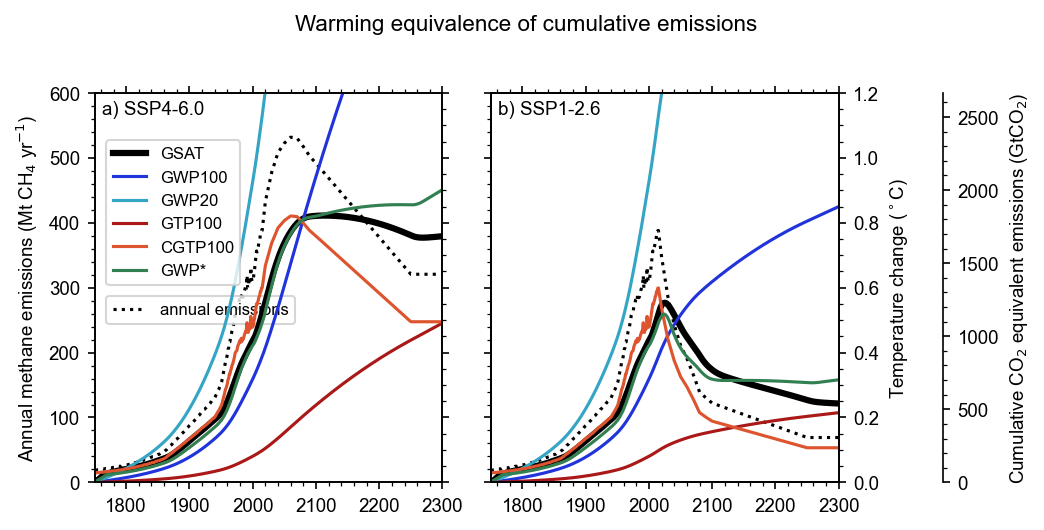

In [21]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
fig, ax = pl.subplots(1, 2, figsize=(18/2.54, 9/2.54))
ax[0].plot(yrlong,e60long,label='annual emissions',color=colors['GSAT'],linestyle=':')
ax[0].set_ylabel('Annual methane emissions (Mt CH$_{4}$ yr$^{-1}$)')
ax[1].plot(years,emissions['ssp126'][:,3],label='annual emissions',color=colors['GSAT'],linestyle=':')
ax[1].set_yticklabels([])
#ax[1].set_ylabel('Annual methane emissions (Mt CH$_{4}$)')
ax0_1 = ax[0].twinx()
ax1_1 = ax[1].twinx()
ax0_1.plot(years,T60_ch4,color=colors['GSAT'],label='GSAT',linewidth=3)
ax0_1.plot(years,T60_GWP100,color=colors['GWP100'],label='GWP100')
ax0_1.plot(years,T60_GWP20,color=colors['GWP20'],label='GWP20')
ax0_1.plot(years,T60_GTP100,color=colors['GTP100'],label='GTP100')
ax0_1.plot(years,T60_CGTP,color=colors['CGTP'],label='CGTP100')
ax0_1.plot(yr_gwp,T60_GWPstar,color=colors['GWP*'],label='GWP*')

ax1_1.plot(years,T26_ch4,color=colors['GSAT'],label='GSAT',linewidth=3)
ax1_1.plot(years,T26_GWP100,color=colors['GWP100'],label='GWP100')
ax1_1.plot(years,T26_GWP20,color=colors['GWP20'],label='GWP20')
ax1_1.plot(years,T26_GTP100,color=colors['GTP100'],label='GTP100')
ax1_1.plot(years,T26_CGTP,color=colors['CGTP'],label='CGTP100')
ax1_1.plot(yr_gwp,T26_GWPstar,color=colors['GWP*'],label='GWP*')

#ax0_1.set_ylabel('Temperature change ($^\circ$C)')
ax1_1.set_ylabel('Temperature change ($^\circ$C)')
 

ax[0].legend(loc='upper left',bbox_to_anchor=(0.01, 0.5),fontsize=8)
ax0_1.legend(loc='upper left',bbox_to_anchor=(0.01, 0.9),fontsize=8)


fig.suptitle('Warming equivalence of cumulative emissions')

ax[0].text(0.02, 0.98, 'a) SSP4-6.0',verticalalignment='top', horizontalalignment='left',transform=ax[0].transAxes)
ax[1].text(0.02, 0.98, 'b) SSP1-2.6',verticalalignment='top', horizontalalignment='left',transform=ax[1].transAxes)
#ax[1].set_ylabel('Total radiative forcing (W.m$^{-2}$)')
ax[0].set_xlim(1750,2300)
ax[1].set_xlim(1750,2300)
ax[0].set_ylim(0,600)
ax[1].set_ylim(0,600)
ax0_1.set_ylim(0,1.2)
ax0_1.set_yticklabels([])
ax1_1.set_ylim(0,1.2)


#ax0_2 = ax[0].twinx()
ax1_2 = ax[1].twinx()

#ax0_2.spines["right"].set_position(("axes", 1.25))
#ax0_2.set_ylim(0,cumCO2scale)
#ax0_2.set_ylabel('Cumulative CO$_{2}$ equivalent emissions (GtCO$_{2}$)')
ax1_2.spines["right"].set_position(("axes", 1.3))
ax1_2.set_ylim(0,cumCO2scale * 1.2)   # whatever y-lim for temperature is
ax1_2.set_ylabel('Cumulative CO$_{2}$ equivalent emissions (GtCO$_{2}$)')

#make_patch_spines_invisible(ax0_2)
#ax0_2.spines["right"].set_visible(True)
ax1_2.spines["right"].set_visible(True)

fig.tight_layout(rect=[0,0,1,0.96])
# fig.savefig("../figures/fig7.22.pdf")
# fig.savefig("../figures/fig7.22.png", dpi=300)

<>:107: SyntaxWarning: invalid escape sequence '\c'
<>:107: SyntaxWarning: invalid escape sequence '\c'
C:\Users\mastr\AppData\Local\Temp\ipykernel_22420\387236443.py:107: SyntaxWarning: invalid escape sequence '\c'
  ax1_2.set_ylabel('                                 Temperature change ($^\circ$C)', loc='bottom', fontsize=12)


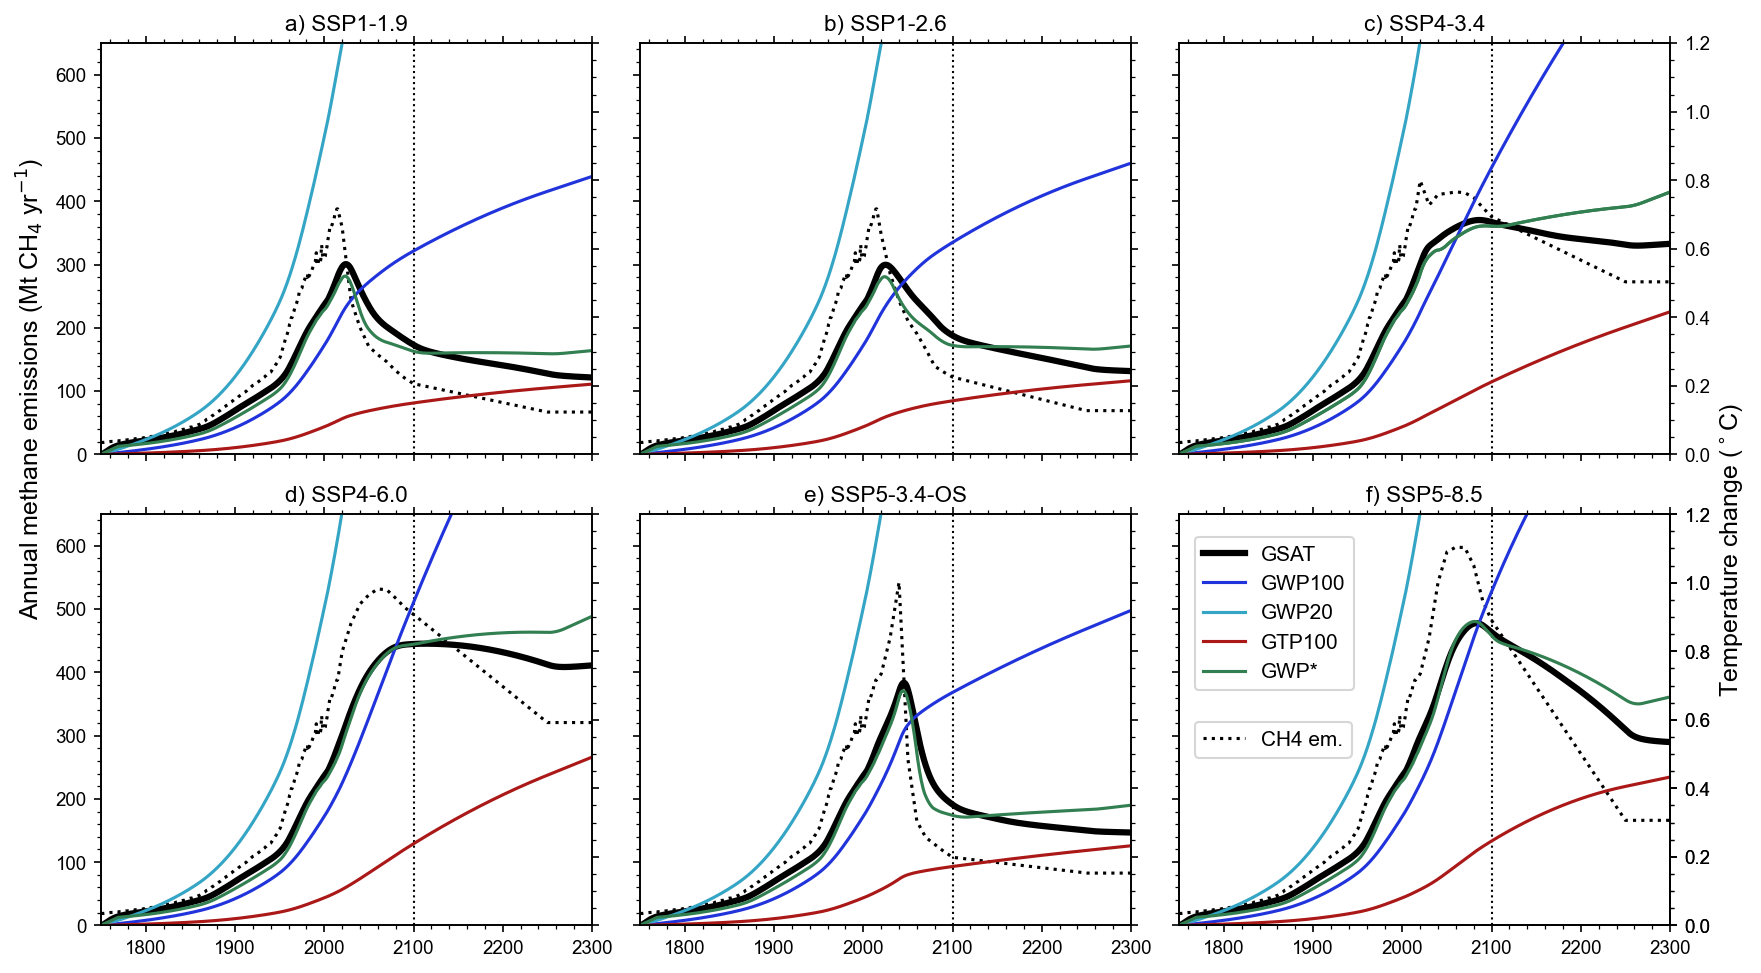

In [22]:
#numbers match fossil fuel CH4 in AR6 table 7.15
TCRE = 1.65 # per Tt C
cumCO2scale = 3664/TCRE  #conversion for GtCO2

colors = {
    # 'CGTP': '#dd542e',
    'GWP100': '#2134db',
    'GTP100': '#aa1818',
    'GWP20': '#35a5c5',
    'GWP*': '#327f51',
    'GSAT': '#000000'
}

width_inch = 14
height_inch = 8

fig, axs = pl.subplots(2, 3, figsize=(30/2.54, 17/2.54))

for i, ax in enumerate (axs.flatten()):
    
    ax1 = ax.twinx()
    ax1.axvline(2100, linewidth = 1, linestyle=':', color = "black")

    ax.label_outer()
    ax1.label_outer()
    
    ax.set_xlim(1750,2300)
    ax.set_ylim(0,650)

    ax1.set_xlim(1750,2300)
    ax1.set_ylim(0,1.2)

    
    if i == 0:
        ax.set_title('a) SSP1-1.9')
        ax.plot(years,emissions['ssp119'][:,3],label='CH4 em.',color=colors['GSAT'],linestyle=':')
        ax1.plot(years,T19_ch4,color=colors['GSAT'],label='GSAT',linewidth=3)
        ax.set_ylabel('Annual methane emissions (Mt CH$_{4}$ yr$^{-1}$)                                         ',fontsize=12)
        ax1.plot(years,T19_GWP100,color=colors['GWP100'],label='GWP100')
        ax1.plot(years,T19_GWP20,color=colors['GWP20'],label='GWP20')
        ax1.plot(years,T19_GTP100,color=colors['GTP100'],label='GTP100')
        # # # ax1.plot(years,T19_CGTP,color=colors['CGTP'],label='CGTP100')
        ax1.plot(yr_gwp,T19_GWPstar,color=colors['GWP*'],label='GWP*')

    if i == 1:
        ax.set_title('b) SSP1-2.6')
        ax.plot(years,emissions['ssp126'][:,3],label='CH4 em.',color=colors['GSAT'],linestyle=':')
        ax1.plot(years,T26_ch4,color=colors['GSAT'],label='GSAT',linewidth=3)
        ax1.plot(years,T26_GWP100,color=colors['GWP100'],label='GWP100')
        ax1.plot(years,T26_GWP20,color=colors['GWP20'],label='GWP20')
        ax1.plot(years,T26_GTP100,color=colors['GTP100'],label='GTP100')
        # # # ax1.plot(years,T26_CGTP,color=colors['CGTP'],label='CGTP100')
        ax1.plot(yr_gwp,T26_GWPstar,color=colors['GWP*'],label='GWP*')

    if i == 2:
        ax.set_title('c) SSP4-3.4')
        ax.plot(years,emissions['ssp434'][:,3],label='CH4 em.',color=colors['GSAT'],linestyle=':')
        ax1.plot(years,T34_ch4,color=colors['GSAT'],label='GSAT',linewidth=3)
        ax1.plot(yr_gwp,T34_GWPstar,color=colors['GWP*'],label='GWP*')
        ax1.plot(years,T34_GWP100,color=colors['GWP100'],label='GWP100')
        ax1.plot(years,T34_GWP20,color=colors['GWP20'],label='GWP20')
        ax1.plot(years,T34_GTP100,color=colors['GTP100'],label='GTP100')
        # # # ax1.plot(years,T34_CGTP,color=colors['CGTP'],label='CGTP100')
        ax1.plot(yr_gwp,T34_GWPstar,color=colors['GWP*'],label='GWP*')
        # ax0_2 = ax.twinx()
        # ax0_2.spines["right"].set_position(("axes", 1.25))
        # ax0_2.set_ylim(0,cumCO2scale * 1.2)
    if i == 3:
        ax.set_title('d) SSP4-6.0')
        ax.plot(years,emissions['ssp460'][:,3],label='CH4 em.',color=colors['GSAT'],linestyle=':')
        ax1.plot(years,T60_ch4,color=colors['GSAT'],label='GSAT',linewidth=3)
        ax1.plot(years,T60_GWP100,color=colors['GWP100'],label='GWP100')
        ax1.plot(years,T60_GWP20,color=colors['GWP20'],label='GWP20')
        ax1.plot(years,T60_GTP100,color=colors['GTP100'],label='GTP100')
        # # # ax1.plot(years,T60_CGTP,color=colors['CGTP'],label='CGTP100')
        ax1.plot(yr_gwp,T60_GWPstar,color=colors['GWP*'],label='GWP*')

        # ax.set_ylabel('Temperature change ($^\circ$C)                                ', loc='top', fontsize=12)
    if i == 4:
        ax.set_title('e) SSP5-3.4-OS')
        ax.plot(years,emissions['ssp534-over'][:,3],label='CH4 em.',color=colors['GSAT'],linestyle=':')
        ax1.plot(years,T34o_ch4,color=colors['GSAT'],label='GSAT',linewidth=3)
        ax1.plot(years,T34o_GWP100,color=colors['GWP100'],label='GWP100')
        ax1.plot(years,T34o_GWP20,color=colors['GWP20'],label='GWP20')
        ax1.plot(years,T34o_GTP100,color=colors['GTP100'],label='GTP100')
        # # # ax1.plot(years,T34o_CGTP,color=colors['CGTP'],label='CGTP100')
        ax1.plot(yr_gwp,T34o_GWPstar,color=colors['GWP*'],label='GWP*')

    if i == 5:
        ax.set_title('f) SSP5-8.5')
        ax.plot(years,emissions['ssp585'][:,3],label='CH4 em.',color=colors['GSAT'],linestyle=':')
        ax1.plot(years,T85_ch4,color=colors['GSAT'],label='GSAT',linewidth=3)
        ax1.plot(years,T85_GWP100,color=colors['GWP100'],label='GWP100')
        ax1.plot(years,T85_GWP20,color=colors['GWP20'],label='GWP20')
        ax1.plot(years,T85_GTP100,color=colors['GTP100'],label='GTP100')
        # # # ax1.plot(years,T85_CGTP,color=colors['CGTP'],label='CGTP100')
        ax1.plot(yr_gwp,T85_GWPstar,color=colors['GWP*'],label='GWP*')
    
ax.legend(loc='upper left',bbox_to_anchor=(0.01, 0.52),fontsize=10)
ax1.legend(loc='upper left',bbox_to_anchor=(0.01, 0.97),fontsize=10)

title=('Warming equivalence of cumulative emissions_IRF')
# fig.suptitle(title, fontsize=14)

ax1_2 = ax.twinx()
ax1_2.set_ylim(0,1.2)
ax1_2.set_ylabel('                                 Temperature change ($^\circ$C)', loc='bottom', fontsize=12)

# ax1_2.spines["right"].set_position(("axes", 1.25))
# ax1_2.set_ylim(0,cumCO2scale * 1.2)   # whatever y-lim for temperature is
# ax1_2.set_ylabel('                 Cumulative CO$_{2}$ equivalent emissions (GtCO$_{2}$)', loc='bottom', fontsize=12)

#make_patch_spines_invisible(ax0_2)
#ax0_2.spines["right"].set_visible(True)
# ax1_2.spines["right"].set_visible(True)

fig.tight_layout(rect=[0,0,1,0.98])
# output_file = os.path.join(out_path,title) + "_clean.png"
# plt.savefig(output_file)
# fig.savefig(os.path.join(out_path,"fig7.22.png"), dpi=300)

Import IRF data

In [21]:
data_path = 'C:/Users/mastr/Documents/LSCE/fig_722_IRF IPCC AR5'
file = "/IRF_GWPstar_scenarios.xlsx"
df_irf = pd.read_excel(os.path.join(data_path+file), sheet_name = [0,1,2,3,4,5])


Import ACC2 data

OLD 

In [24]:
data_path = 'C:/Users/mastr/Documents/LSCE/fig722_ACC2'

##=================== GWPstar ===================##
file = '/ACC2_TEST_gwpstar_gwpparam_opt.csv' #use r before absolute file path 
gwpstar=pd.read_csv(os.path.join(data_path+file), header=0)

##=================== noCH4 ===================##
file = '/ACC2_TEST_noCH4.csv' #use r before absolute file path 
noch4=pd.read_csv(os.path.join(data_path+file), header=0)

##=================== GWP100 ===================##
file = '/ACC2_TEST_gwp100.csv' #use r before absolute file path 
gwp100=pd.read_csv(os.path.join(data_path+file), header=0)

##=================== DEFAULT (GSAT) ===================##
file = '/ACC2_TEST_default.csv' #use r before absolute file path 
gsat=pd.read_csv(os.path.join(data_path+file), header=0)

##=================== CH4 EMISSIONS (ACC2) ===================##
file='/ACC2_ch4_emissions.csv'
emissions=pd.read_csv(os.path.join(data_path+file), header=0)

years = np.arange(1750,2501)

gwpstar = gwpstar.subtract(noch4); gwpstar.drop('YEAR', axis = 1)
gwp100 = gwp100.subtract(noch4); gwp100.drop('YEAR', axis = 1)
gsat = gsat.subtract(noch4); gsat.drop('YEAR', axis = 1);

gwpstar = gwpstar.drop(columns = ["YEAR","ssp245","ssp370"])
gsat = gsat.drop(columns = ["YEAR","ssp245","ssp370"])

NEW

In [22]:
import glob
data_path = "C:/Users/mastr/Documents/LSCE/fig722_ACC2/ACC2_v420_m1_NoCCF_Fscl_CS30_ST20_D4_A2rG4_ssp_rcp_Matteo_working_version_12_testCOST _gwpparam"


all_files = glob.glob(os.path.join(data_path + "/out_future_ipsl_gwpstar_ssp*.csv"))
dfs = list()
for f in all_files:
    data = pd.read_csv(f,  delim_whitespace=True)
    scen = os.path.basename(f).split('_')[4][:-4]
    year = data["YEAR"]
    data[scen] = data["T2M"] #os.path.basename(f).split('_')[2][:-4]
    dfs.append(data[scen])
    df_gwpstar_acc2 = pd.concat(dfs, axis = 1)


all_files = glob.glob(os.path.join(data_path + "/out_future_ipsl_noCH4_ssp*.csv"))
dfs = list()
for f in all_files:
    data = pd.read_csv(f,  delim_whitespace=True)
    scen = os.path.basename(f).split('_')[4][:-4]
    year = data["YEAR"]
    data[scen] = data["T2M"] #os.path.basename(f).split('_')[2][:-4]
    dfs.append(data[scen])
    df_noch4_acc2 = pd.concat(dfs, axis = 1)


all_files = glob.glob(os.path.join(data_path + "/out_future_ipsl_default_ssp*.csv"))
dfs = list()
for f in all_files:
    data = pd.read_csv(f,  delim_whitespace=True)
    scen = os.path.basename(f).split('_')[4][:-4]
    year = data["YEAR"]
    data[scen] = data["T2M"] #os.path.basename(f).split('_')[2][:-4]
    dfs.append(data[scen])
    df_default_acc2 = pd.concat(dfs, axis = 1)

all_files = glob.glob(os.path.join(data_path + "/out_past_ipsl_default*.csv"))
for f in all_files:
    df_past_default = pd.read_csv(f,  header = 0, delim_whitespace=True)

all_files = glob.glob(os.path.join(data_path + "/out_past_ipsl_noCH4*.csv"))
for f in all_files:
    df_past_noch4 = pd.read_csv(f,  header = 0, delim_whitespace=True)

all_files = glob.glob(os.path.join(data_path + "/out_past_ipsl_gwpstar.csv"))
for f in all_files:
    df_past_gwpstar = pd.read_csv(f,  header = 0, delim_whitespace=True)



data = df_past_gwpstar.copy()
for scen in df_gwpstar_acc2.columns:
    data[scen] = df_past_gwpstar["T2M"]
data = data.drop(data.iloc[:, 0:20],axis = 1)
df_gwpstar = pd.concat([data,df_gwpstar_acc2[1:]], axis = 0, ignore_index = True)

data = df_past_noch4.copy()
for scen in df_noch4_acc2.columns:
    data[scen] = df_past_noch4["T2M"]
data = data.drop(data.iloc[:, 0:20],axis = 1)
df_noch4 = pd.concat([data,df_noch4_acc2[1:]], axis = 0, ignore_index = True)

data = df_past_default.copy()
for scen in df_default_acc2.columns:
    data[scen] = df_past_default["T2M"]
data = data.drop(data.iloc[:, 0:20],axis = 1)
df_default = pd.concat([data,df_default_acc2[1:]], axis = 0, ignore_index = True)

df_gwpstar = df_gwpstar.subtract(df_noch4)
df_default = df_default.subtract(df_noch4)

PLOT

<>:62: SyntaxWarning: invalid escape sequence '\c'
<>:62: SyntaxWarning: invalid escape sequence '\c'
C:\Users\mastr\AppData\Local\Temp\ipykernel_41732\3814603305.py:62: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('                                   Temperature change ($^\circ$C)', loc='bottom', fontsize=12)


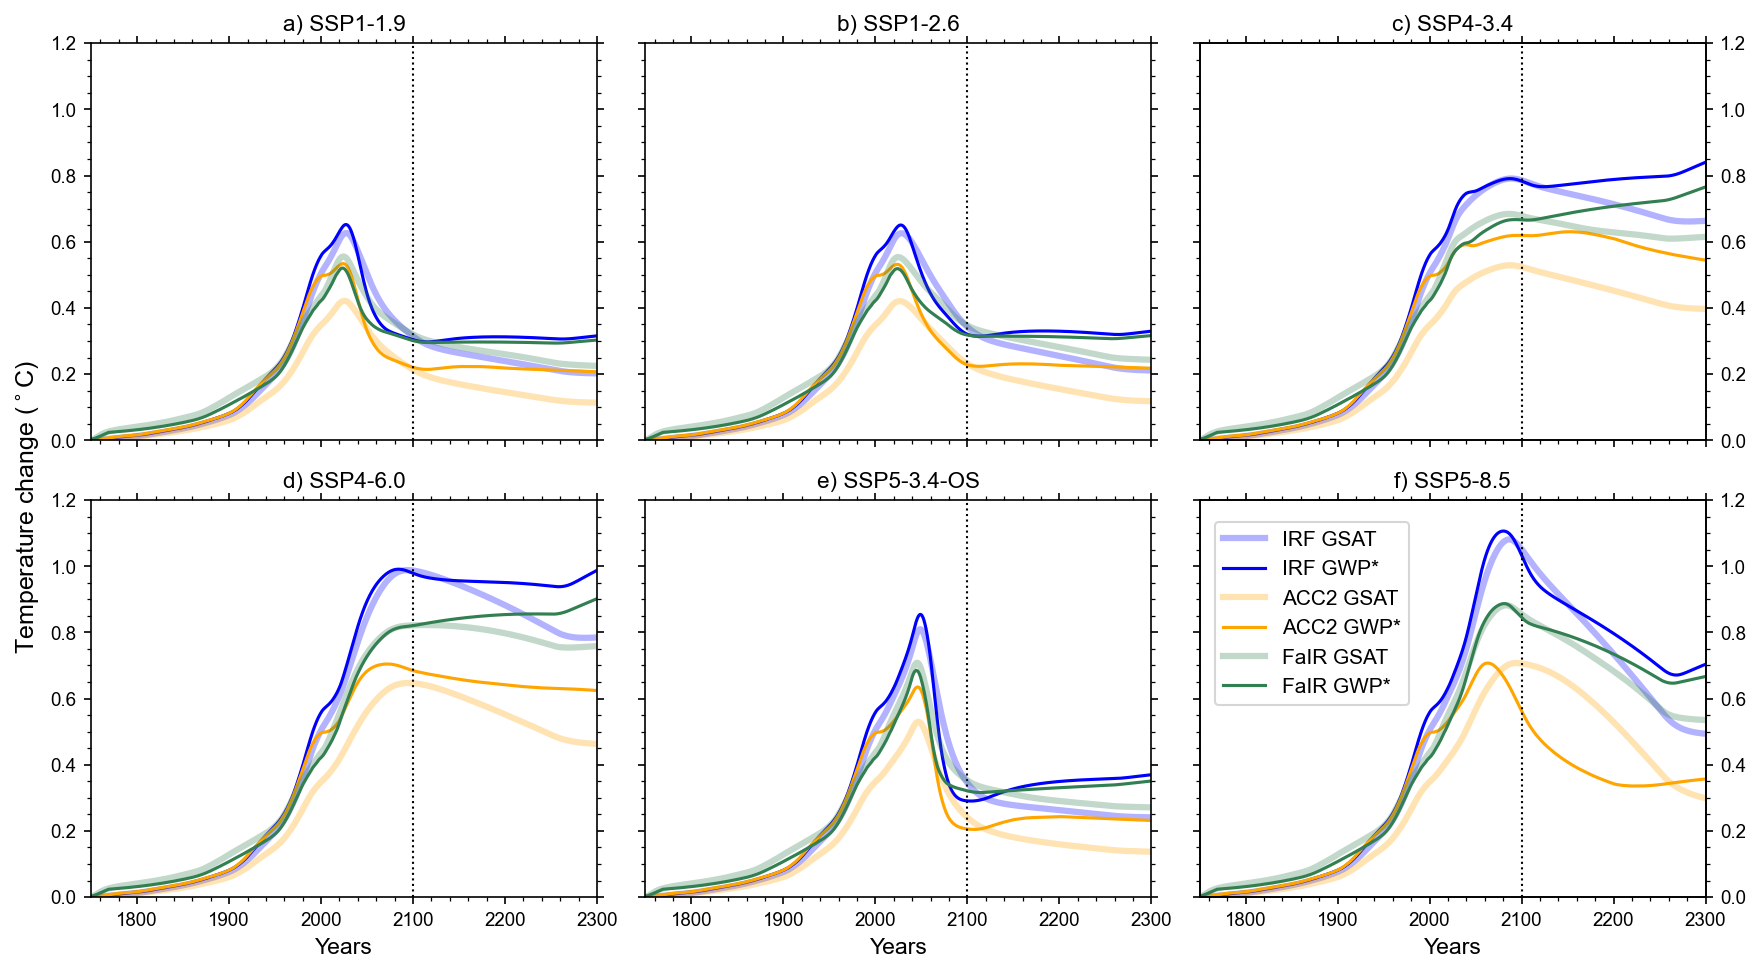

In [31]:
years = np.arange(1750,2501)
time_irf = df_irf[0].iloc[:,0]
years_fair = years[:651]

#numbers match fossil fuel CH4 in AR6 table 7.15
TCRE = 1.65 # per Tt C
cumCO2scale = 3664/TCRE  #conversion for GtCO2

colors = {
    'CGTP': '#dd542e',
    'GWP100': '#2134db',
    'GTP100': '#aa1818',
    'GWP20': '#35a5c5',
    'GWP*': '#327f51',
    'GSAT': 'black',
    'IRF': 'blue',
    'ACC2': 'orange'
}

width_inch = 14
height_inch = 8

fig, axs = pl.subplots(2, 3, figsize=(30/2.54, 17/2.54))

for i, ax in enumerate (axs.flatten()):

    irf_ssp = df_irf[i].drop(columns="Time", axis=1)
    ax.plot(time_irf,irf_ssp['GSAT'].iloc[::-1],color=colors['IRF'],alpha = 0.3,label='IRF GSAT',linewidth=3)
    ax.plot(time_irf,irf_ssp['GWP*'].iloc[::-1],color=colors['IRF'],label='IRF GWP*')
    ax.plot(years,df_default.iloc[:,i],color=colors['ACC2'],alpha = 0.3,label='ACC2 GSAT',linewidth=3)
    ax.plot(years,df_gwpstar.iloc[:,i],color=colors['ACC2'],label='ACC2 GWP*')

    ax.axvline(2100, linewidth = 1, linestyle=':', color = "black")
    ax.label_outer()
    ax.set_xlim(1750,2300)
    ax.set_xlim(1750,2300)
    ax.set_ylim(0,1.2)

    if i == 0:
        ax.set_title('a) SSP1-1.9')
        ax.plot(years_fair,T19_ch4,color=colors['GWP*'],label='FaIR GSAT',alpha = 0.3,linewidth=3)
        ax.plot(yr_gwp,T19_GWPstar,color=colors['GWP*'],label='FaIR GWP*')

    if i == 1:
        ax.set_title('b) SSP1-2.6')
        ax.plot(years_fair,T26_ch4,color=colors['GWP*'],label='FaIR GSAT',alpha = 0.3,linewidth=3)
        ax.plot(yr_gwp,T26_GWPstar,color=colors['GWP*'],label='FaIR GWP*')

    if i == 2:
        ax.set_title('c) SSP4-3.4')
        ax.plot(years_fair,T34_ch4,color=colors['GWP*'],label='FaIR GSAT',alpha = 0.3,linewidth=3)
        ax.plot(yr_gwp,T34_GWPstar,color=colors['GWP*'],label='FaIR GWP*')
        ax0_2 = ax.twinx()
        ax0_2.set_ylim(0,1.2)

    if i == 3:
        ax.set_title('d) SSP4-6.0')
        ax.plot(years_fair,T60_ch4,color=colors['GWP*'],label='FaIR GSAT',alpha = 0.3,linewidth=3)
        ax.plot(yr_gwp,T60_GWPstar,color=colors['GWP*'],label='FaIR GWP*')

        ax.set_xlabel('Years', fontsize=11)
        ax.set_ylabel('                                   Temperature change ($^\circ$C)', loc='bottom', fontsize=12)

    if i == 4:
        ax.set_title('e) SSP5-3.4-OS')
        ax.plot(years_fair,T34o_ch4,color=colors['GWP*'],label='FaIR GSAT',alpha = 0.3,linewidth=3)
        ax.plot(yr_gwp,T34o_GWPstar,color=colors['GWP*'],label='FaIR GWP*')
        ax.set_xlabel('Years', fontsize=11)

    if i == 5:
        ax.set_title('f) SSP5-8.5')
        ax.plot(years_fair,T85_ch4,color=colors['GWP*'],label='FaIR GSAT',alpha = 0.3,linewidth=3)
        ax.plot(yr_gwp,T85_GWPstar,color=colors['GWP*'],label='FaIR GWP*')
        ax.set_xlabel('Years', fontsize=11)

ax.legend(loc='upper left',bbox_to_anchor=(0.01, 0.97),fontsize=10)

title=('Warming equivalence of cumulative emissions_IRF')

ax_2 = ax.twinx()
ax_2.set_ylim(0,1.2)
# ax_2.set_ylabel('                                 Temperature change ($^\circ$C)', loc='bottom', fontsize=12)

fig.tight_layout(rect=[0,0,1,0.98])
# output_file = os.path.join(out_path,title) + "_clean.png"
# plt.savefig(output_file)
# fig.savefig(os.path.join(out_path,"fig7.22.png"), dpi=300)